Thanks for coming to see my notebook!
I am not a fluent English writer, so I apologize if I am difficult to understand!

# Import Library

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")

# Data Incorporation

In [2]:
train_df = pd.read_csv("/kaggle/input/playground-series-s3e11/train.csv")
print(train_df.shape)
train_df.head()

(360336, 17)


,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [3]:
original_df = pd.read_csv("/kaggle/input/media-campaign-cost-prediction/train_dataset.csv")
print(original_df.shape)
original_df.head()

(51363, 16)


,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,2.68,2.0,1.0,0.0,2.0,6.30,1.0,0.0,22.0,30584.0,1.0,1.0,1.0,1.0,1.0,79.59
1,5.73,3.0,5.0,5.0,3.0,18.70,1.0,0.0,30.0,20319.0,0.0,0.0,0.0,0.0,0.0,118.36
2,2.62,2.0,1.0,1.0,1.0,9.21,0.0,0.0,9.0,20319.0,0.0,0.0,0.0,0.0,0.0,67.20
3,11.73,3.0,1.0,1.0,3.0,10.90,1.0,1.0,15.0,23112.0,1.0,1.0,1.0,1.0,1.0,60.87
4,4.82,2.0,1.0,1.0,3.0,8.15,0.0,0.0,7.0,38382.0,0.0,0.0,0.0,0.0,0.0,86.79


In [4]:
test_df = pd.read_csv("/kaggle/input/playground-series-s3e11/test.csv")
print(test_df.shape)
test_df.head()

(240224, 16)


,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,360336,7.24,4.0,1.0,0.0,2.0,10.80,0.0,1.0,7.0,20319.0,0.0,0.0,0.0,0.0,0.0
1,360337,6.90,2.0,2.0,2.0,3.0,8.51,1.0,0.0,4.0,33858.0,1.0,0.0,1.0,1.0,1.0
2,360338,8.34,3.0,0.0,0.0,3.0,8.77,0.0,1.0,14.0,39696.0,0.0,0.0,1.0,1.0,0.0
3,360339,5.48,2.0,3.0,3.0,2.0,21.90,1.0,0.0,9.0,23688.0,1.0,1.0,1.0,1.0,1.0
4,360340,4.80,3.0,2.0,0.0,2.0,10.90,1.0,0.0,11.0,27694.0,1.0,1.0,1.0,1.0,1.0


# Data Check
## Add 'Flag' to distinguish between the original and the generated dataset.
## Next, we check the structure of the data.
### Combine train_df and original_df and Check the data type and null.

In [5]:
train_df = train_df.drop("id",axis=1)
test_df = test_df.drop("id",axis=1)
train_df["flag"] = 1
test_df["flag"] = 1
original_df["flag"] = 0
train_df = pd.concat([train_df,original_df]).reset_index(drop=True)
train_df.head()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,flag
0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09,1
1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80,1
2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51,1
3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78,1
4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51,1


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411699 entries, 0 to 411698
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   store_sales(in millions)    411699 non-null  float64
 1   unit_sales(in millions)     411699 non-null  float64
 2   total_children              411699 non-null  float64
 3   num_children_at_home        411699 non-null  float64
 4   avg_cars_at home(approx).1  411699 non-null  float64
 5   gross_weight                411699 non-null  float64
 6   recyclable_package          411699 non-null  float64
 7   low_fat                     411699 non-null  float64
 8   units_per_case              411699 non-null  float64
 9   store_sqft                  411699 non-null  float64
 10  coffee_bar                  411699 non-null  float64
 11  video_store                 411699 non-null  float64
 12  salad_bar                   411699 non-null  float64
 13  prepared_food 

In [7]:
train_df.isnull().sum().sum()

0

No missing values

In [8]:
train_df.describe()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,flag
count,411699.000000,411699.000000,411699.000000,411699.000000,411699.000000,411699.000000,411699.000000,411699.000000,411699.000000,411699.000000,411699.000000,411699.000000,411699.000000,411699.000000,411699.000000,411699.000000,411699.000000
mean,6.361631,3.049784,2.466666,0.707184,2.203265,13.820005,0.566883,0.330710,18.958215,28155.234521,0.570769,0.286923,0.515187,0.515209,0.510506,99.578841,0.875241
std,3.328577,0.790272,1.489275,1.227098,1.087416,4.615743,0.495507,0.470469,10.219328,5936.497402,0.494967,0.452326,0.499770,0.499769,0.499890,29.950044,0.330445
min,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000,0.000000
25%,3.740000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000,1.000000
50%,5.800000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000,1.000000
75%,8.430000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000,1.000000
max,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000,1.000000


# Variable Meaning
## According to the original dataset, each column has the following meaning.



```
Food Mart (CFM) is a chain of convenience stores in the United States. The private company's headquarters are located in Mentor, Ohio, and currently, approximately 325 stores are located in the US. Convenient Food Mart operates on the franchise system.
Food Mart was the nation's third-largest chain of convenience stores as of 1988.
The NASDAQ exchange dropped Convenient Food Mart the same year when the company failed to meet financial reporting requirements.
Carden & Cherry advertised Convenient Food Mart with the Ernest character in the 1980s.
Your Task is to devise a Machine Learning Model that helps us predict the cost of media campaigns in the food marts on the basis of the features provided.

Dataset Description
store_sales(in millions) - store_sales(in million dollars)
unit_sales(in millions) - unit_sales(in millions) in stores Quantity
Total_children - TOTAL CHILDREN IN HOME
avg_cars_at home(approx) - avg_cars_at home(approx)
Num_children_at_home - num_children_at_home AS PER CUSTOMERS FILLED DETAILS
Gross_weight - gross_weight OF ITEM
Recyclable_package - FOOD ITEM IS recyclable_package
Low_fat - LOW_FAT FOOD ITEM IS LOW FAT
Units_per_case - UNITS/CASE UNITS AVAILABLE IN EACH STORE SHELVES
Store_sqft - STORE AREA AVAILABLE IN SQFT
Coffee_bar - COFFEE BAR available in store
Video_store - VIDEO STORE/gaming store available
Salad_bar - SALAD BAR available in store
Prepared_food - food prepared available in store
Florist - flower shelves available in store
Cost - COST ON ACQUIRING A CUSTOMERS in dollars
```


https://www.kaggle.com/datasets/gauravduttakiit/media-campaign-cost-prediction?select=test_dataset.csv

# Histograms of All Variables
## Histograms help you understand the distribution of each piece of data.

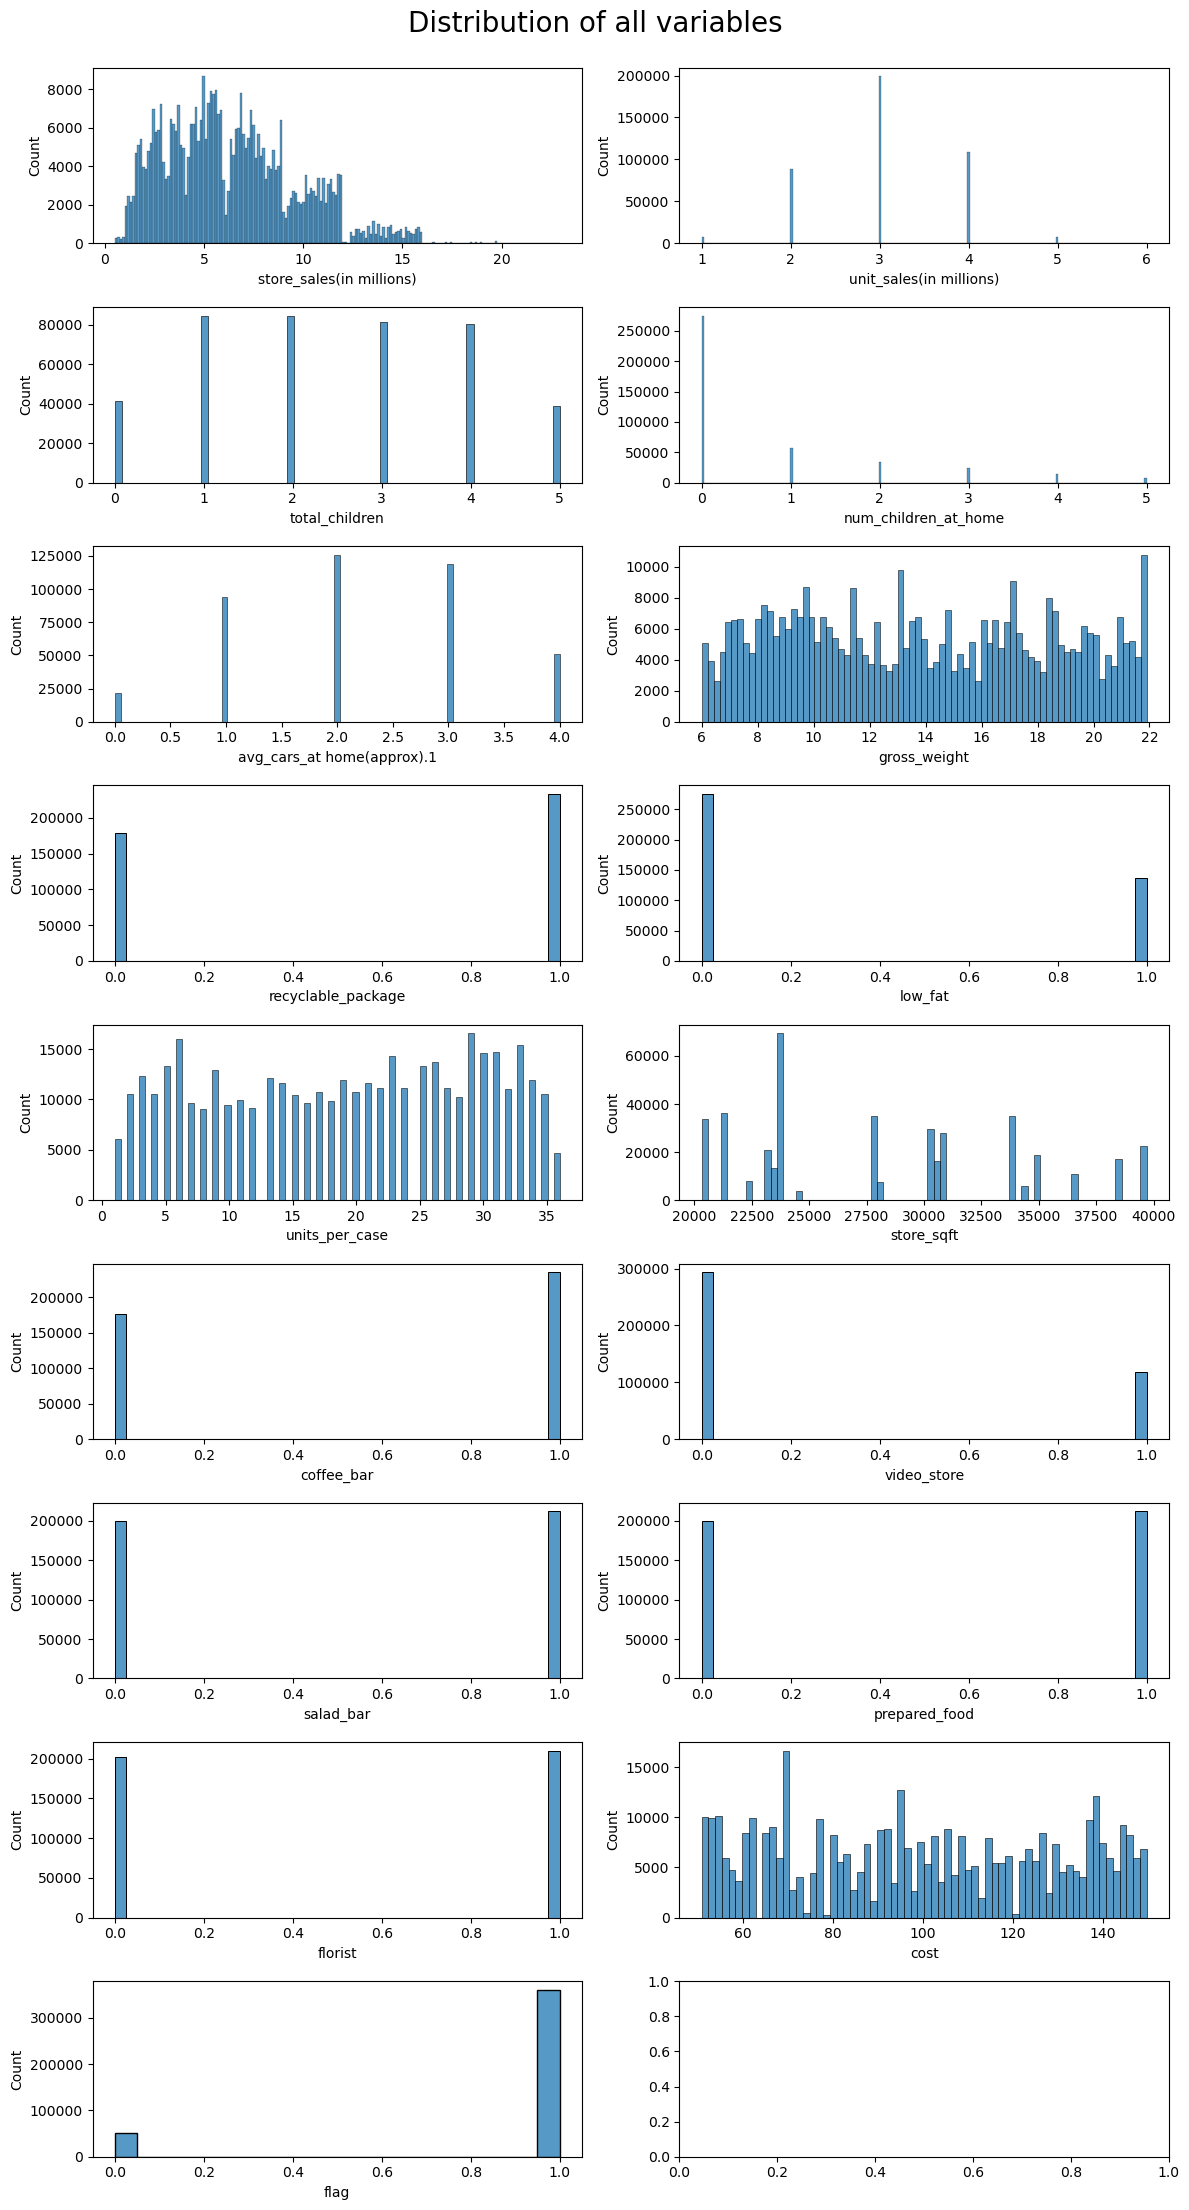

In [9]:
ncols = 2
nrows = np.ceil(len(train_df.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(train_df.columns, axs.flatten()):
    sns.histplot(train_df, x=c, ax=ax)
fig.suptitle('Distribution of all variables', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Correlation coefficient for TARGET
## Using correlation coefficients and heat maps, find variables that are significantly involved in TARGET.

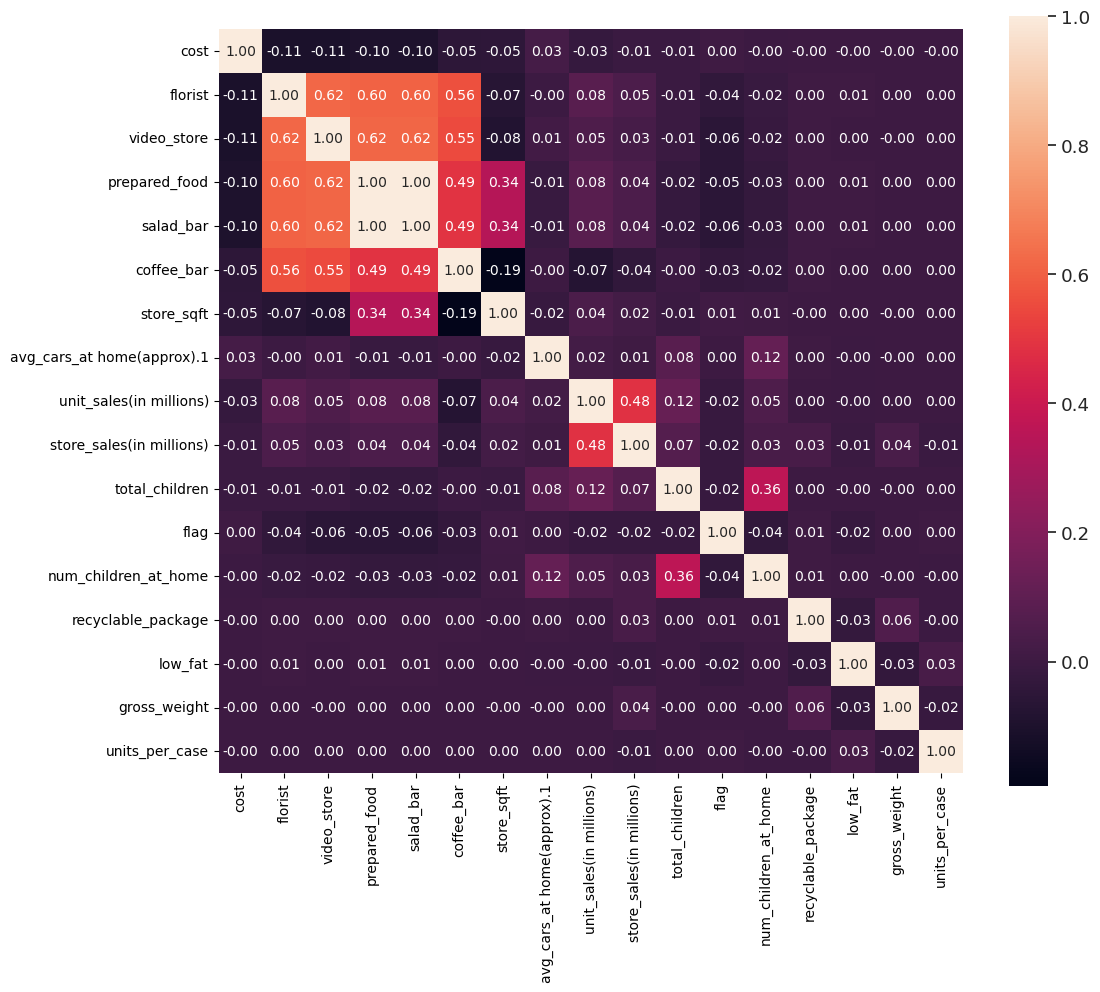

In [10]:
TARGET = "cost"
k = 20
corrmat = train_df.corr()
corrmat = np.abs(corrmat)
cols = corrmat.nlargest(k, TARGET)[TARGET].index
cm = np.corrcoef(train_df[cols].values.T)
fig, ax = plt.subplots(figsize=(12, 10))
sns.set(font_scale=1.2,font="IPAexGothic")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Let's try machine learning in this state...

In [11]:
import xgboost as xgb
import lightgbm as lgb
import catboost as cat
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [12]:
y = train_df[TARGET]
y = np.log(y+1)
X = train_df.drop(TARGET,axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,random_state=0)

In [14]:
xgb_params = {
        'max_depth': 4,
        'objective': 'reg:squarederror',
        'seed':42,
        'n_estimators':20000,
        'learning_rate':0.05,
        'n_jobs': -1,
        }

model_xgb = xgb.XGBRegressor(**xgb_params)
model_xgb.fit(X_train,
              y_train,
              eval_metric='rmse', 
              eval_set=[(X_train, y_train),(X_valid, y_valid)],
              early_stopping_rounds=10,
              verbose=100)

[0]	validation_0-rmse:3.87285	validation_1-rmse:3.87211
[100]	validation_0-rmse:0.30558	validation_1-rmse:0.30639
[200]	validation_0-rmse:0.30335	validation_1-rmse:0.30440
[300]	validation_0-rmse:0.30266	validation_1-rmse:0.30387
[400]	validation_0-rmse:0.30211	validation_1-rmse:0.30346
[473]	validation_0-rmse:0.30174	validation_1-rmse:0.30319


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=20000,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [15]:
lgb_params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'learning_rate':0.05,
        'task': 'train', 
        'seed':42,
        'n_estimators':20000,
}
model_lgb = lgb.LGBMRegressor(**lgb_params)
model_lgb.fit(X_train,
              y_train,
              eval_set=[(X_train, y_train),(X_valid, y_valid)],
              verbose=100,
              early_stopping_rounds=10)

[100]	training's rmse: 0.301188	valid_1's rmse: 0.302302
[200]	training's rmse: 0.299053	valid_1's rmse: 0.300611
[300]	training's rmse: 0.297526	valid_1's rmse: 0.299527
[400]	training's rmse: 0.296419	valid_1's rmse: 0.298966
[500]	training's rmse: 0.295506	valid_1's rmse: 0.298606
[600]	training's rmse: 0.294693	valid_1's rmse: 0.298373


LGBMRegressor(learning_rate=0.05, metric='rmse', n_estimators=20000,
              objective='regression', seed=42, task='train')

In [16]:
cb_params = {
        'loss_function':'RMSE',
        'learning_rate':0.05,
        'iterations':20000,
        
}
model_cb = cat.CatBoostRegressor(**cb_params)
model_cb.fit(X_train,
              y_train,
              eval_set=[(X_train, y_train),(X_valid, y_valid)],
              verbose=1000,
              early_stopping_rounds=10,
              use_best_model=True)

0:	learn: 0.3158235	test: 0.3158235	test1: 0.3165501	best: 0.3165501 (0)	total: 114ms	remaining: 38m 3s
1000:	learn: 0.2974927	test: 0.2974927	test1: 0.3000679	best: 0.3000647 (995)	total: 34.7s	remaining: 10m 57s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.3000390711
bestIteration = 1035

Shrink model to first 1036 iterations.


# Create a submission file

In [17]:
sub = pd.read_csv("/kaggle/input/playground-series-s3e11/sample_submission.csv")
sub[TARGET] = (np.exp(model_xgb.predict(test_df))-1)
sub.to_csv("/kaggle/working/xgb.csv",index=False)
sub[TARGET] = (np.exp(model_lgb.predict(test_df))-1)
sub.to_csv("/kaggle/working/lgb.csv",index=False)
sub[TARGET] = (np.exp(model_cb.predict(test_df))-1)
sub.to_csv("/kaggle/working/cb.csv",index=False)
sub[TARGET] = (np.exp(model_xgb.predict(test_df))+np.exp(model_lgb.predict(test_df))+np.exp(model_cb.predict(test_df))-3)/3
sub.to_csv("/kaggle/working/mix.csv",index=False)

# score
### xgb:0.30187
### lgb:0.29694
### cb:0.29882
### mix:0.29887